In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [30]:
# Cargar datos
train_df = pd.read_excel('E-Commerce_train.xlsx')
test_df = pd.read_excel('E-Commerce_test.xlsx')

In [31]:
train_df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
# Remover columna index innecesaria 
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)
train_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [33]:
train_df.columns = ['warehouse_block','mode_of_shipment','customer_care_calls','customer_rating',
'cost_of_the_product','prior_purchases','product_importance','gender','discount_offered',
'weight_in_gms','reached.on.time_y.n']

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      8999 non-null   object
 1   mode_of_shipment     8999 non-null   object
 2   customer_care_calls  8999 non-null   int64 
 3   customer_rating      8999 non-null   int64 
 4   cost_of_the_product  8999 non-null   int64 
 5   prior_purchases      8999 non-null   int64 
 6   product_importance   8999 non-null   object
 7   gender               8999 non-null   object
 8   discount_offered     8999 non-null   int64 
 9   weight_in_gms        8999 non-null   int64 
 10  reached.on.time_y.n  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 773.5+ KB


In [35]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,8999.0,4.015113,1.138934,2.0,3.0,4.0,5.0,7.0
customer_rating,8999.0,2.994999,1.413143,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,8999.0,208.561507,48.289172,96.0,168.0,211.0,249.5,310.0
prior_purchases,8999.0,3.511501,1.532074,2.0,3.0,3.0,4.0,10.0
discount_offered,8999.0,15.097678,17.400040,1.0,4.0,8.0,19.0,65.0
weight_in_gms,8999.0,3584.364596,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0
reached.on.time_y.n,8999.0,0.635515,0.481312,0.0,0.0,1.0,1.0,1.0


# Encoding
Transformar valores categóricos a valores numéricos

In [51]:
train_df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [61]:
n = 'warehouse_block'
df_ohe = train_df.copy()
label_1 = pd.get_dummies(df_ohe, prefix=n, columns=[n])
label_1

,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F
0,Flight,4,2,177,3,low,F,44,1233,1,0,0,0,1,0
1,Flight,4,5,216,2,low,M,59,3088,1,0,0,0,0,1
2,Flight,2,2,183,4,low,M,48,3374,1,1,0,0,0,0
3,Flight,3,3,176,4,medium,M,10,1177,1,0,1,0,0,0
4,Flight,2,2,184,3,medium,F,46,2484,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,Ship,3,1,217,3,low,F,1,4177,1,0,0,0,1,0
8995,Ship,5,3,232,3,medium,M,3,4526,0,0,0,0,0,1
8996,Ship,4,5,260,3,medium,F,6,4221,0,1,0,0,0,0
8997,Ship,4,2,184,3,medium,F,5,5931,1,0,1,0,0,0


In [62]:
n = 'mode_of_shipment'
df_ohe = train_df.copy()
label_2 = pd.get_dummies(label_1, prefix=n, columns=[n])
label_2

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship
0,4,2,177,3,low,F,44,1233,1,0,0,0,1,0,1,0,0
1,4,5,216,2,low,M,59,3088,1,0,0,0,0,1,1,0,0
2,2,2,183,4,low,M,48,3374,1,1,0,0,0,0,1,0,0
3,3,3,176,4,medium,M,10,1177,1,0,1,0,0,0,1,0,0
4,2,2,184,3,medium,F,46,2484,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,low,F,1,4177,1,0,0,0,1,0,0,0,1
8995,5,3,232,3,medium,M,3,4526,0,0,0,0,0,1,0,0,1
8996,4,5,260,3,medium,F,6,4221,0,1,0,0,0,0,0,0,1
8997,4,2,184,3,medium,F,5,5931,1,0,1,0,0,0,0,0,1


In [63]:
n = 'product_importance'
df_ohe = train_df.copy()
label_3 = pd.get_dummies(label_2, prefix=n, columns=[n])
label_3

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,gender,discount_offered,weight_in_gms,reached.on.time_y.n,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium
0,4,2,177,3,F,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,M,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,M,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,M,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,F,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,F,1,4177,1,0,0,0,1,0,0,0,1,0,1,0
8995,5,3,232,3,M,3,4526,0,0,0,0,0,1,0,0,1,0,0,1
8996,4,5,260,3,F,6,4221,0,1,0,0,0,0,0,0,1,0,0,1
8997,4,2,184,3,F,5,5931,1,0,1,0,0,0,0,0,1,0,0,1


In [64]:
n = 'gender'
df_ohe = train_df.copy()
label_4 = pd.get_dummies(label_3, prefix=n, columns=[n])
label_4

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium,gender_F,gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,1,0,0,0,1,0,0,0,1,0,1,0,1,0
8995,5,3,232,3,3,4526,0,0,0,0,0,1,0,0,1,0,0,1,0,1
8996,4,5,260,3,6,4221,0,1,0,0,0,0,0,0,1,0,0,1,1,0
8997,4,2,184,3,5,5931,1,0,1,0,0,0,0,0,1,0,0,1,1,0


In [66]:
# Ordernar columnas
train_df = label_4[['warehouse_block_A','warehouse_block_B','warehouse_block_C','warehouse_block_D','warehouse_block_F','mode_of_shipment_Flight','mode_of_shipment_Road','mode_of_shipment_Ship','customer_care_calls','customer_rating','cost_of_the_product','prior_purchases','product_importance_low','product_importance_medium','product_importance_high','gender_F','gender_M','discount_offered','weight_in_gms','reached.on.time_y.n']]
train_df.head()

,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance_low,product_importance_medium,product_importance_high,gender_F,gender_M,discount_offered,weight_in_gms,reached.on.time_y.n
0,0,0,0,1,0,1,0,0,4,2,177,3,1,0,0,1,0,44,1233,1
1,0,0,0,0,1,1,0,0,4,5,216,2,1,0,0,0,1,59,3088,1
2,1,0,0,0,0,1,0,0,2,2,183,4,1,0,0,0,1,48,3374,1
3,0,1,0,0,0,1,0,0,3,3,176,4,0,1,0,0,1,10,1177,1
4,0,0,1,0,0,1,0,0,2,2,184,3,0,1,0,1,0,46,2484,1


<AxesSubplot:>

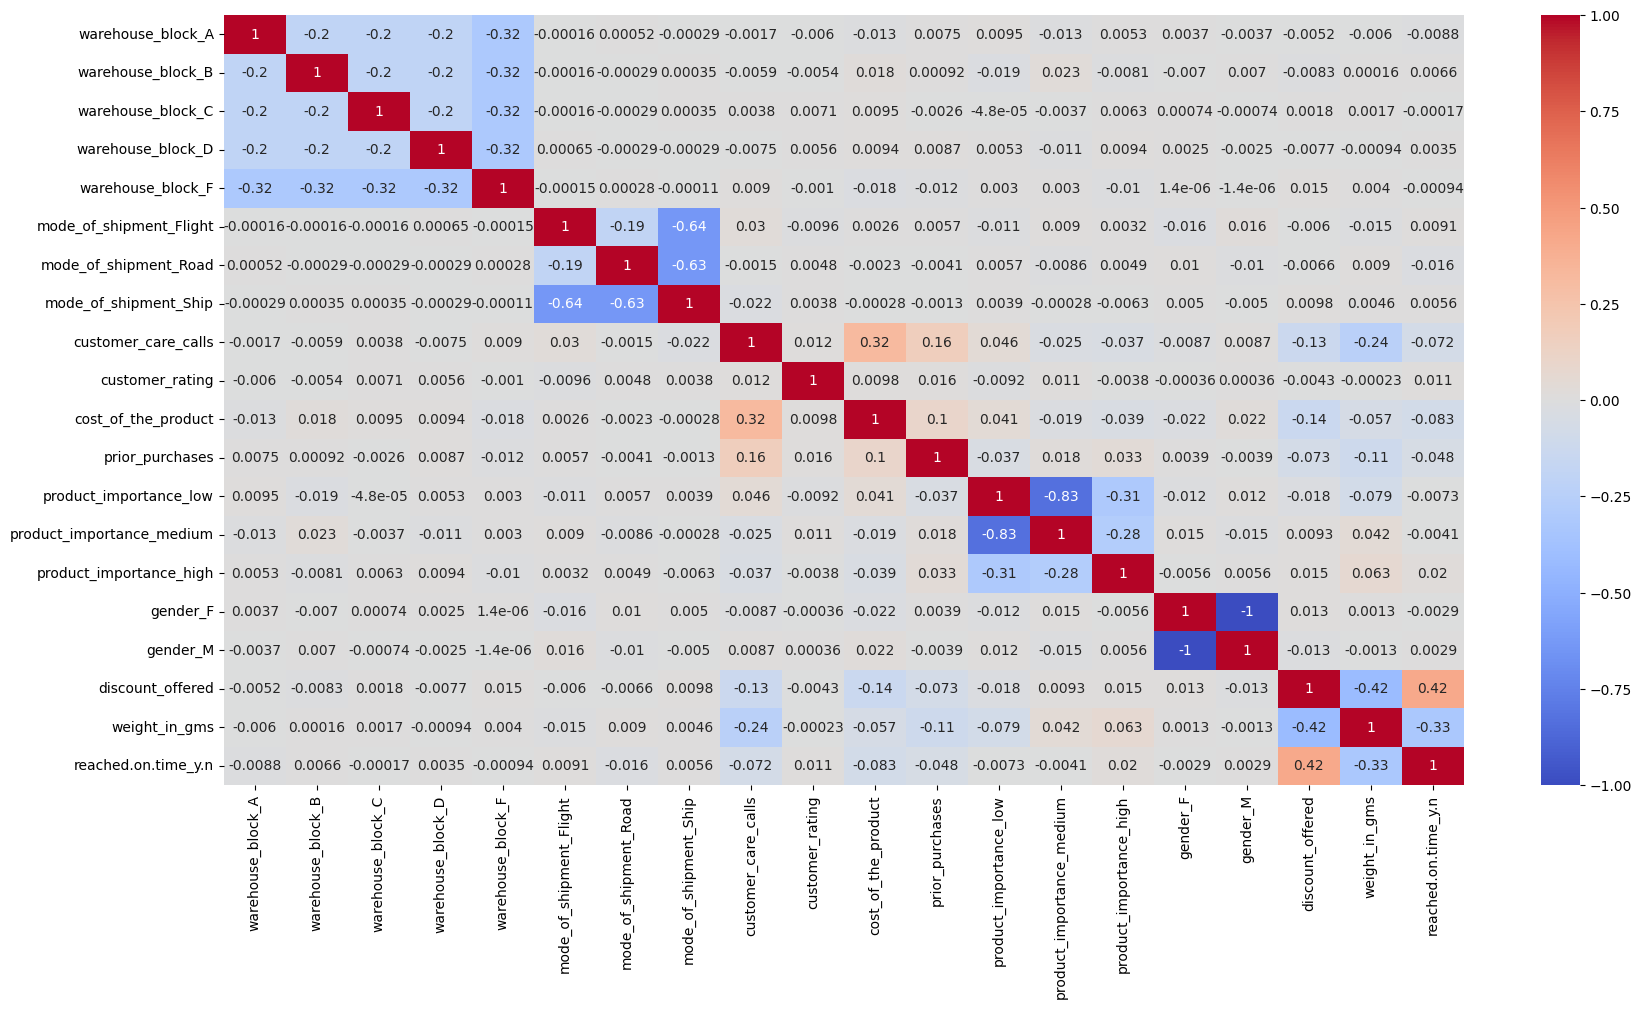

In [70]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

# Modelado

In [79]:
# Dividir dataframe en features y label
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]
X.shape, y.shape

((8999, 19), (8999,))

In [81]:
# Separar datos para entrenar y testear
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [82]:
# Escalar datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Predecir usando Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=40, random_state=0)
forest.fit(X_train, y_train)
y_test_pred_forest = forest.predict(X_test)
y_train_pred_forest = forest.predict(X_train)
print(f"Precisión: {forest.score(X_test, y_test)}")

Precisión: 0.6844444444444444


In [96]:
# Predecir usando K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)
print(f"Precisión: {knn.score(X_test, y_test)}")

Precisión: 0.6666666666666666


# Matriz de confusión

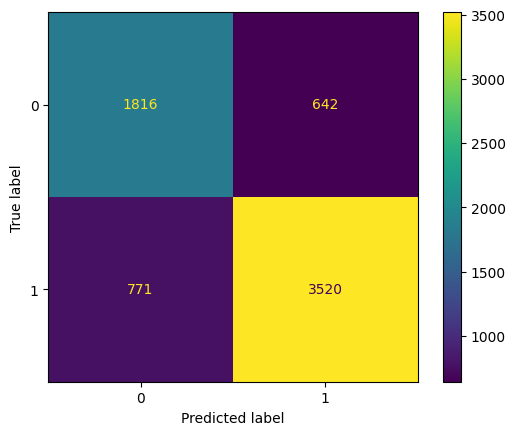

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_train, y_train_pred_knn)
# Graficar matriz
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()

# Recall

In [98]:
from sklearn.metrics import recall_score

score = recall_score(y_test, y_test_pred_knn)
score

0.7086834733893558